# Build CALSPEC list

- Author Sylvie Dagoret-Campagne
- Creation : August 22th 2023
- Update :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style, quantity_support
plt.style.use(astropy_mpl_style)
quantity_support()
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline

In [2]:
from astroquery.simbad import Simbad

In [3]:
plt.rcParams["axes.labelsize"]="large"
plt.rcParams["axes.linewidth"]=2.0
plt.rcParams["xtick.major.size"]=8
plt.rcParams["ytick.major.size"]=8
plt.rcParams["ytick.minor.size"]=5
plt.rcParams["xtick.labelsize"]="large"
plt.rcParams["ytick.labelsize"]="large"

plt.rcParams["figure.figsize"]=(12,8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
#plt.rcParams['axes.facecolor'] = 'blue'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
plt.rcParams['lines.markersize'] = 5  # markersize, in points
plt.rcParams['grid.alpha'] = 0.75 # transparency, between 0.0 and 1.0
plt.rcParams['grid.linestyle'] = '-' # simple line
plt.rcParams['grid.linewidth'] = 0.4 # in points
plt.rcParams['font.size'] = 13

## CALSPEC

Use the package getCalspec to work on CALSPEC object

https://github.com/LSSTDESC/getCalspec/blob/main/getCalspec/getCalspec.py

https://github.com/LSSTDESC/getCalspec/tree/main/getCalspec

In [4]:
# to get all Calspec data in one time in cache, write¶
from getCalspec.rebuild import rebuild_cache
# rebuild_cache()

In [5]:
# When the STSC webpage is updated, it might be necessary to rebuild the calspec_data/calspec.csv table and the cache:¶
from getCalspec.rebuild import rebuild_tables, rebuild_cache
#rebuild_tables()
#rebuild_cache()

### Retrieve all calspec

In [6]:
from getCalspec.getCalspec import getCalspecDataFrame

In [7]:
df = getCalspecDataFrame()

In [8]:
df

,Unnamed: 0,Star_name,Sp_T,V,B_V,Name,Model,STIS,Var_(%),RA,Decl,Vr,PM,PM.1,Simbad_Name,Alt_Simbad_Name,Astroquery_Name,Alt_Star_name,HD_name
0,0,109 VIR,A0III,3.73,-0.01,109vir,_mod_003,_stis_003,NaN,14 46 14.925,+01 53 34.38,-6.1,-114.03,-22.13,HD130109,NaN,* 109 VIR,NaN,HD130109
1,1,10 LAC,O9V,4.88,-0.21,10lac,_mod_005,_stis_007,<0.23,22 39 15.679,+39 03 00.97,-10.0,-0.32,-5.46,NaN,NaN,* 10 LAC,NaN,HD214680
2,2,16 CYG B,G3V,6.20,0.66,16cygb,_mod_003,_stis_003,<0.21,19 41 51.973,+50 31 03.09,-27.7,-134.79,-162.49,HD186427,NaN,* 16 CYG B,NaN,HD186427
3,3,18 SCO,G2V,5.50,0.65,18sco,_mod_004,_stis_004,NaN,16 15 37.270,-08 22 09.98,11.9,232.16,-495.37,HD146233,NaN,* 18 SCO,NaN,HD146233
4,4,1732526,A4V,12.53,0.12,1732526,_mod_005,_stisnic_007,1.40,17 32 52.630,+71 04 43.12,NaN,0.22,-2.71,2MASS J17325264+7104431,TYC 4424-1286-1,TYC 4424-1286-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,126,SUN,G2V,-26.75,0.63,sun_reference,NaN,_stis_002*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,127,SUN,G2V,-26.75,0.63,sun,_mod_001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,128,WD0320-539,DA,14.9,...,wd0320_539,_mod_001,_stis_005,NaN,03 22 14.820,-53 45 16.47,57.8,6.56,-59.93,NaN,NaN,LB 1663,NaN,NaN
129,129,WD0947+857,DA,16.4,...,wd0947_857,_mod_003,_stis_006,NaN,09 57 54.296,+85 29 40.88,NaN,-28.13,-27.27,NaN,NaN,RX J0957.8+8529,NaN,NaN


In [9]:
import astropy.units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
from astropy.coordinates import Angle
from astropy.time import Time, TimezoneInfo,TimeDelta

In [10]:
from datetime import datetime
import timezonefinder, pytz
from calendar import monthrange
import calendar

## Calculate the Visibility of the star

### Observation date

In [11]:
NYEAR=2023
NMONTH=9
NDAY=12

### Examples from https://docs.astropy.org/en/stable/generated/examples/coordinates/plot_obs-planning.html

In [12]:
m33 = SkyCoord.from_name('M33')

In [13]:
bear_mountain = EarthLocation(lat=41.3*u.deg, lon=-74*u.deg, height=390*u.m)
utcoffset = -4*u.hour  # Eastern Daylight Time
time = Time('2023-9-12 23:00:00') - utcoffset

In [14]:
m33altaz = m33.transform_to(AltAz(obstime=time,location=bear_mountain))
print(f"M33's Altitude = {m33altaz.alt:.2}")

M33's Altitude = 4.1e+01 deg


## My Location

In summer the UTC offset at my location is + 2 H

In [15]:
mylat = 48.8534
mylong = 2.3488

In [16]:
paris = EarthLocation(lat=mylat*u.deg, lon=mylong*u.deg, height=0*u.m)
utcoffset = 2*u.hour  # CET
time = Time('2023-9-12 23:00:00') - utcoffset

In [17]:
tf = timezonefinder.TimezoneFinder()
mytimezone_str = tf.certain_timezone_at(lat=mylat, lng=mylong)

In [18]:
mytimezone_str

'Europe/Paris'

In [19]:
if mytimezone_str is None:
    print("Could not determine my time zone")
else:
    # Display the current time in that time zone
    
    
    timezone = pytz.timezone(mytimezone_str)
    timezone0 = pytz.timezone('UTC')
    
    dt = datetime.utcnow()
    timeParis_now = datetime.now(timezone)
    
    print("The UTC Time now %s" % dt)
    print("The actual time in %s is %s" % (mytimezone_str, dt + timezone.utcoffset(dt)))

The UTC Time now 2023-08-22 15:47:34.209786
The actual time in Europe/Paris is 2023-08-22 17:47:34.209786


### For LSST

### Observation location

In [20]:
LSSTNAME='Cerro Pachon'
lsst_location=EarthLocation.of_site(LSSTNAME)
longitude=lsst_location.lon
latitude=lsst_location.lat
altitude=lsst_location.height

In [21]:
cerro_pachon = EarthLocation(lat=latitude.degree*u.deg, lon=longitude.degree*u.deg, height=altitude)

### Determination of UTC offset from TimeZone in Chile

In [22]:
tf = timezonefinder.TimezoneFinder()
timezone_str = tf.certain_timezone_at(lat=latitude.degree, lng=longitude.degree)

In [23]:
print(f"Time zone at Rubin LSST Observatory: {timezone_str}")

Time zone at Rubin LSST Observatory: America/Santiago


In [24]:
if timezone_str is None:
    print("Could not determine the time zone")
else:
    # Display the current time in that time zone
    
    #tz = pytz.timezone('Europe/Berlin')
    #berlin_now = datetime.now(tz)
    
    timezone = pytz.timezone(timezone_str)
    timezone0 = pytz.timezone('UTC')
    
    dt = datetime.utcnow()
    timeChile_now = datetime.now(timezone)
    
    print("The UTC Time now %s" % dt)
    print("The actual time in %s is %s" % (timezone_str, dt + timezone.utcoffset(dt)))

The UTC Time now 2023-08-22 15:47:34.571777
The actual time in America/Santiago is 2023-08-22 11:47:34.571777


In [25]:
utcoffset=timezone.utcoffset(dt).total_seconds()/60./60.
print("The UTC offset in Chile is ",utcoffset," hours")

The UTC offset in Chile is  -4.0  hours


In [26]:
tz_utc_minus_xx_hours = TimezoneInfo(utc_offset=int(utcoffset)*u.hour)
tz_utc_minus_xx_hours

In [27]:
timezone.utcoffset

<bound method DstTzInfo.utcoffset of <DstTzInfo 'America/Santiago' LMT-1 day, 19:17:00 STD>>

### Night of observation

In [28]:
night_obs = datetime(NYEAR, NMONTH, NDAY, 0, 0)
night_obs_midnight= datetime(NYEAR, NMONTH, NDAY, 23, 59,59,tzinfo = tz_utc_minus_xx_hours)

In [29]:
night_obs_str=night_obs.strftime("%Y-%m-%d %H:%M:%S")
print(f"Night of Observation : {night_obs_str}")

Night of Observation : 2023-09-12 00:00:00


In [30]:
night_obs_midnight_str=night_obs_midnight.strftime("%Y-%m-%d %H:%M:%S")
night_obs_midnight_str
print(f"Midnight of Night of Observation : {night_obs_midnight_str}")

Midnight of Night of Observation : 2023-09-12 23:59:59


### Compute UTC and Sideral Time at local midnight

In [31]:
tz_utc = TimezoneInfo() 
print("Local time in Santiago in summer (GMT-4) in summer : ",night_obs_midnight)
print("Time in UTC                               : ",night_obs_midnight.astimezone(tz_utc))

Local time in Santiago in summer (GMT-4) in summer :  2023-09-12 23:59:59-04:00
Time in UTC                               :  2023-09-13 03:59:59+00:00


### Sideral time at midnight

In [32]:
t_lsst = Time(night_obs_midnight.astimezone(tz_utc), scale='utc',location=lsst_location)
t_sidereal_lsst = t_lsst.sidereal_time('apparent')  
print("Sideral Time :",t_sidereal_lsst)

Sideral Time : 22h44m36.72873971s


In [33]:
print("Sideral Time :",Angle(t_sidereal_lsst).to(u.degree))

Sideral Time : 341d09m10.93109565s


In [34]:
print("Sideral Time :",Angle(t_sidereal_lsst).degree)

Sideral Time : 341.153036415458


In [35]:
# To check
t_lsst_2 = Time('2023-09-13 03:59:59', scale='utc',location=('-70.73668333d', '-30.24074167d'))
t_lsst_2.sidereal_time('apparent') 

<Longitude 22.74353576 hourangle>

## Filter Obervable targets according RA and magnitude

- Select the target which Right-Asccention is +/- 6 hours from the sideral time

- The culmination Hour angle at the meridian must not be less than -6H to + 6H

In [36]:
MarginAngle = Angle(6.0,u.hour)
MarginAngle

<Angle 6. hourangle>

In [37]:
magLim = 12.

In [38]:
all_flag_select = []
for index, row in df.iterrows(): 
    target_name = row["Star_name"]
    hd_name = row["HD_name"]
    ra_angle = Angle(row['RA'],unit = u.hour) # the RA angle is a string in Sexagesimal hours 
    dec_angle = Angle(row["Decl"],unit = u.deg) 	
    
    ra_min = (t_sidereal_lsst - MarginAngle).degree*u.deg
    ra_max = (t_sidereal_lsst + MarginAngle).degree*u.deg
    
    
    if (index !=12) and (index !=13) and (index!= 95):
        magV = float(row["V"])
    else:
        if index == 12:
            magV =12.47
        elif index==13:
            magV = 13.80
        elif index == 95:
            magV = 17.01
            
             
  
    ra_min_angle = Angle(ra_min,u.degree)
    ra_max_angle = Angle(ra_max,u.degree)
    
    flag1 = ra_angle.is_within_bounds(ra_min,ra_max)
    flag2 = (magV < magLim)
    
    flag = flag1 & flag2
    
    if flag:
        print(f"{index}, {target_name} ({hd_name}), RA = {ra_angle.hour:.2f} , DEC = {dec_angle.degree:.2f} , (RA-MIN,RA-MAX) = ({ra_min_angle.hour:.2f}, {ra_max_angle.hour:.2f} ), magV = {magV} {flag}")
   
    all_flag_select.append(flag)                

1, 10 LAC (HD214680), RA = 22.65 , DEC = 39.05 , (RA-MIN,RA-MAX) = (16.74, 28.74 ), magV = 4.88 True
2, 16 CYG B (HD186427), RA = 19.70 , DEC = 50.52 , (RA-MIN,RA-MAX) = (16.74, 28.74 ), magV = 6.2 True
8, 1802271 (nan), RA = 18.04 , DEC = 60.73 , (RA-MIN,RA-MAX) = (16.74, 28.74 ), magV = 11.53 True
10, 1808347 (nan), RA = 18.14 , DEC = 69.46 , (RA-MIN,RA-MAX) = (16.74, 28.74 ), magV = 11.69 True
15, ALPHA LYR (HD172167), RA = 18.62 , DEC = 38.78 , (RA-MIN,RA-MAX) = (16.74, 28.74 ), magV = 0.031 True
16, BD+02 3375 (nan), RA = 17.66 , DEC = 2.42 , (RA-MIN,RA-MAX) = (16.74, 28.74 ), magV = 9.93 True
22, BD+60 1753 (nan), RA = 17.41 , DEC = 60.43 , (RA-MIN,RA-MAX) = (16.74, 28.74 ), magV = 9.65 True
23, BD+17 4708 (nan), RA = 22.19 , DEC = 18.09 , (RA-MIN,RA-MAX) = (16.74, 28.74 ), magV = 9.47 True
26, DELTA UMI (HD166205), RA = 17.54 , DEC = 86.59 , (RA-MIN,RA-MAX) = (16.74, 28.74 ), magV = 4.34 True
29, FEIGE110 (nan), RA = 23.33 , DEC = -5.17 , (RA-MIN,RA-MAX) = (16.74, 28.74 ), magV 

In [39]:
df["select"] = all_flag_select
cut = df["select"] == True

t=df[cut]
NTargets=len(t)

In [40]:
t

,Unnamed: 0,Star_name,Sp_T,V,B_V,Name,Model,STIS,Var_(%),RA,Decl,Vr,PM,PM.1,Simbad_Name,Alt_Simbad_Name,Astroquery_Name,Alt_Star_name,HD_name,select
1,1,10 LAC,O9V,4.88,-0.21,10lac,_mod_005,_stis_007,<0.23,22 39 15.679,+39 03 00.97,-10.0,-0.32,-5.46,NaN,NaN,* 10 LAC,NaN,HD214680,True
2,2,16 CYG B,G3V,6.20,0.66,16cygb,_mod_003,_stis_003,<0.21,19 41 51.973,+50 31 03.09,-27.7,-134.79,-162.49,HD186427,NaN,* 16 CYG B,NaN,HD186427,True
8,8,1802271,A2V,11.53,0.02,1802271,_mod_005,_stiswfcnic_004,<0.82,18 02 27.163,+60 43 35.54,NaN,5.40,2.17,2MASS J18022716+6043356,TYC 4201-1542-12,BPS BS 17447-0067,NaN,NaN,True
10,10,1808347,A3V,11.69,0.49,1808347,_mod_005,_stiswfc_004,1.65,18 08 34.736,+69 27 28.72,NaN,4.43,8.52,2MASS J18083474+6927286,TYC 4433-1800-1,TYC 4433-1800-1,NaN,NaN,True
15,15,ALPHA LYR,A0V,0.031,0.00,alpha_lyr,_mod_004,_stis_011*,NaN,18 36 56.336,+38 47 01.28,-21.0,200.94,286.23,Vega,HD172167,* ALF LYR,NaN,HD172167,True
16,16,BD+02 3375,A5,9.93,0.45,bd02d3375,_mod_003,_stis_006,NaN,17 39 45.595,+02 24 59.61,-398.0,-366.01,75.12,NaN,NaN,BD+02 3375,NaN,NaN,True
22,22,BD+60 1753,A1V,9.65,0.07,bd60d1753,_mod_005,_stiswfc_004,<0.17,17 24 52.275,+60 25 50.75,-27.3,4.89,3.76,NaN,NaN,BD+60 1753,NaN,NaN,True
23,23,BD+17 4708,sdF8,9.47,0.44,bd_17d4708,NaN,_stisnic_007,NaN,22 11 31.375,+18 05 34.16,-291.0,506.37,60.49,NaN,NaN,BD+17 4708,NaN,NaN,True
26,26,DELTA UMI,A1V,4.34,0.03,delumi,_mod_004,_stis_004,0.04,17 32 12.997,+86 35 11.26,-7.6,10.17,53.97,HD166205,NaN,* DEL UMI,NaN,HD166205,True
29,29,FEIGE110,sdO,11.83,-0.30,feige110,NaN,_stisnic_008*,NaN,23 19 58.400,-05 09 56.17,NaN,-10.68,0.31,NaN,NaN,FEIGE 110,NaN,NaN,True


In [41]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NTargets)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NTargets), alpha=1)

## Target location

In [42]:
all_target_names = t["Astroquery_Name"]
selected_target_locations = [ SkyCoord.from_name(target_name) for target_name in all_target_names]

In [43]:
all_ra=[]
all_dec=[]
for target_loc in selected_target_locations:
    all_ra.append(target_loc.ra)
    all_dec.append(target_loc.dec)

In [44]:
all_target_simbadnames = t["Alt_Simbad_Name"]
all_Vmag = []
all_types = []
all_target_tagnames = []
for idx, target_name in enumerate(all_target_simbadnames):
    try:
        result_table = Simbad.query_object(target_name)
        all_Vmag.append(result_table['FLUX_V'][0])
        all_types.append(result_table['SP_QUAL'][0]) 
        tagname =  target_name + ", t=" + result_table['SP_QUAL'][0] + ", m=" + str(result_table['FLUX_V'][0])
    except:
        row = t.iloc[idx]
        tagname = row["Name"] + ", B-V="+ row["B_V"]  + ", m= " + row["V"]
    print(tagname)
    all_target_tagnames.append(tagname)

10lac, B-V=-0.21, m= 4.88
16cygb, B-V=0.66, m= 6.20
1802271, B-V=0.02, m= 11.53
1808347, B-V=0.49, m= 11.69
alpha_lyr, B-V=0.00, m= 0.031
bd02d3375, B-V=0.45, m= 9.93
bd60d1753, B-V=0.07, m= 9.65
bd_17d4708, B-V=0.44, m= 9.47
delumi, B-V=0.03, m= 4.34
feige110, B-V=-0.30, m= 11.83
hd158485, B-V=0.13, m= 6.50
hd159222, B-V=0.65, m= 6.56
hd160617, B-V=0.45, m= 8.73
hd163466, B-V=0.19, m= 6.85
hd165459, B-V=0.13, m= 6.86
hd167060, B-V=0.64, m= 8.92
hd172728, B-V=-0.05, m= 5.74
hd180609, B-V=0.15, m= 9.42
hd185975, B-V=0.68, m= 8.10
hd200654, B-V=0.63, m= 9.11
hd200775, B-V=0.33, m= 7.43
hd205905, B-V=0.62, m= 6.74
hd209458, B-V=0.59, m= 7.65
bd_28d4211, B-V=-0.34, m= 10.51


/Users/dagoret/opt/anaconda3/lib/python3.9/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'nan': No known catalog could be found
  warnings.warn("Warning: The script line number %i raised "
/Users/dagoret/opt/anaconda3/lib/python3.9/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'nan': No known catalog could be found
  warnings.warn("Warning: The script line number %i raised "
/Users/dagoret/opt/anaconda3/lib/python3.9/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'TYC 4201-1542-12' this identifier has an incorrect format for catalog: 	TYC : Tycho mission
  warnings.warn("Warning: The script line number %i raised "
/Users/dagoret/opt/

# Observation frame

## Initialisation 

In [45]:
midnight_utc = Time(night_obs_midnight_str) - utcoffset*u.hour
delta_midnight = np.linspace(-12, 12, 1000)*u.hour
sideral_times = Angle(t_sidereal_lsst) + Angle(delta_midnight)
times_evening_to_morning = midnight_utc + delta_midnight
frame_evening_to_morning = AltAz(obstime=times_evening_to_morning, location=cerro_pachon)

## Sun frame

In [46]:
from astropy.coordinates import get_sun
sunaltazs_evening_to_morning = get_sun(times_evening_to_morning).transform_to(frame_evening_to_morning)

## Moon frame

In [47]:
from astropy.coordinates import get_moon
moon_evening_to_morning = get_moon(times_evening_to_morning)
moonaltazs_evening_to_morning = moon_evening_to_morning.transform_to(frame_evening_to_morning)

## Target Frame

In [48]:
all_target_altazs_evening_to_morning = [target_location.transform_to(frame_evening_to_morning) for target_location in  selected_target_locations ]

## Distance to the moon

In [49]:
all_target_distancetomoon_evening_to_morning = [] 

num_target=0
for targetcoordinateseries in all_target_altazs_evening_to_morning: 
    N_coord = len(targetcoordinateseries)
    idx_coord = 0
    all_distances_sep = []
    for idx_coord in range(N_coord):
        distance_sep=targetcoordinateseries[idx_coord].separation(moonaltazs_evening_to_morning[idx_coord])
        all_distances_sep.append(distance_sep.degree)
    all_distances_sep= np.array(all_distances_sep)
    all_target_distancetomoon_evening_to_morning.append(all_distances_sep.min()) 
    num_target+=1

In [50]:
all_target_distancetomoon_evening_to_morning 

[120.88920662585383,
 105.23626361209011,
 88.06776925712546,
 83.70471316454729,
 103.75537243330004,
 105.56105288677043,
 83.94925678925192,
 142.63473053705823,
 72.74096380344642,
 153.6078261054993,
 84.68347788066775,
 93.89482981955827,
 112.24661659619193,
 87.10950116047448,
 89.03992896488425,
 114.58843536616035,
 90.54803026933918,
 91.84123000556565,
 106.16627136492866,
 139.96559165329458,
 92.64161219489081,
 161.72279151860553,
 142.1191188717865,
 132.33138490144682]

## Order according increasing maxinum rise time

In [51]:
all_timemax=np.zeros(NTargets)
all_altitudesmax=np.zeros(NTargets)
for idx in np.arange(NTargets):
    altitudes=all_target_altazs_evening_to_morning[idx].alt
    idx_max=np.where(altitudes==altitudes.max())[0][0]
    all_timemax[idx]=delta_midnight[idx_max].value
    all_altitudesmax[idx]=altitudes.max().degree

In [52]:
Angle(altitudes.max()).degree

30.782585575898583

In [53]:
all_altitudesmax

array([ 20.58428459,   9.18266786,  -0.97187924,  -9.70662011,
        20.95194081,  57.35373358,  -0.65477849,  41.54799788,
       -26.81202069,  64.79390448,   1.12345779,  25.50158745,
        79.90612164,  -0.63598171,   1.12739358,  58.53667738,
        -2.79166292,  -4.46140105,  32.84470416,  70.36987628,
        -8.4992733 ,  86.95844636,  40.75878464,  30.78258558])

In [54]:
sorted_indexes=np.argsort(all_timemax)
sorted_indexes

array([ 6,  8, 10, 11,  5, 12, 13,  2, 14,  3, 15,  4, 16, 17,  1, 18, 20,
       19, 21, 23, 22,  7,  0,  9])

In [55]:
sorted_all_timemax=sorted(all_timemax)
sorted_all_timemax

[-5.321321321321322,
 -5.321321321321322,
 -5.297297297297297,
 -5.177177177177177,
 -5.057057057057057,
 -4.984984984984985,
 -4.8408408408408405,
 -4.696696696696697,
 -4.672672672672673,
 -4.6006006006006,
 -4.408408408408408,
 -4.096096096096097,
 -4.096096096096097,
 -3.5195195195195197,
 -3.015015015015015,
 -2.0780780780780788,
 -1.7177177177177185,
 -1.5975975975975985,
 -1.0690690690690694,
 -0.8768768768768762,
 -0.6606606606606604,
 -0.5405405405405403,
 -0.06006006006006004,
 0.6126126126126117]

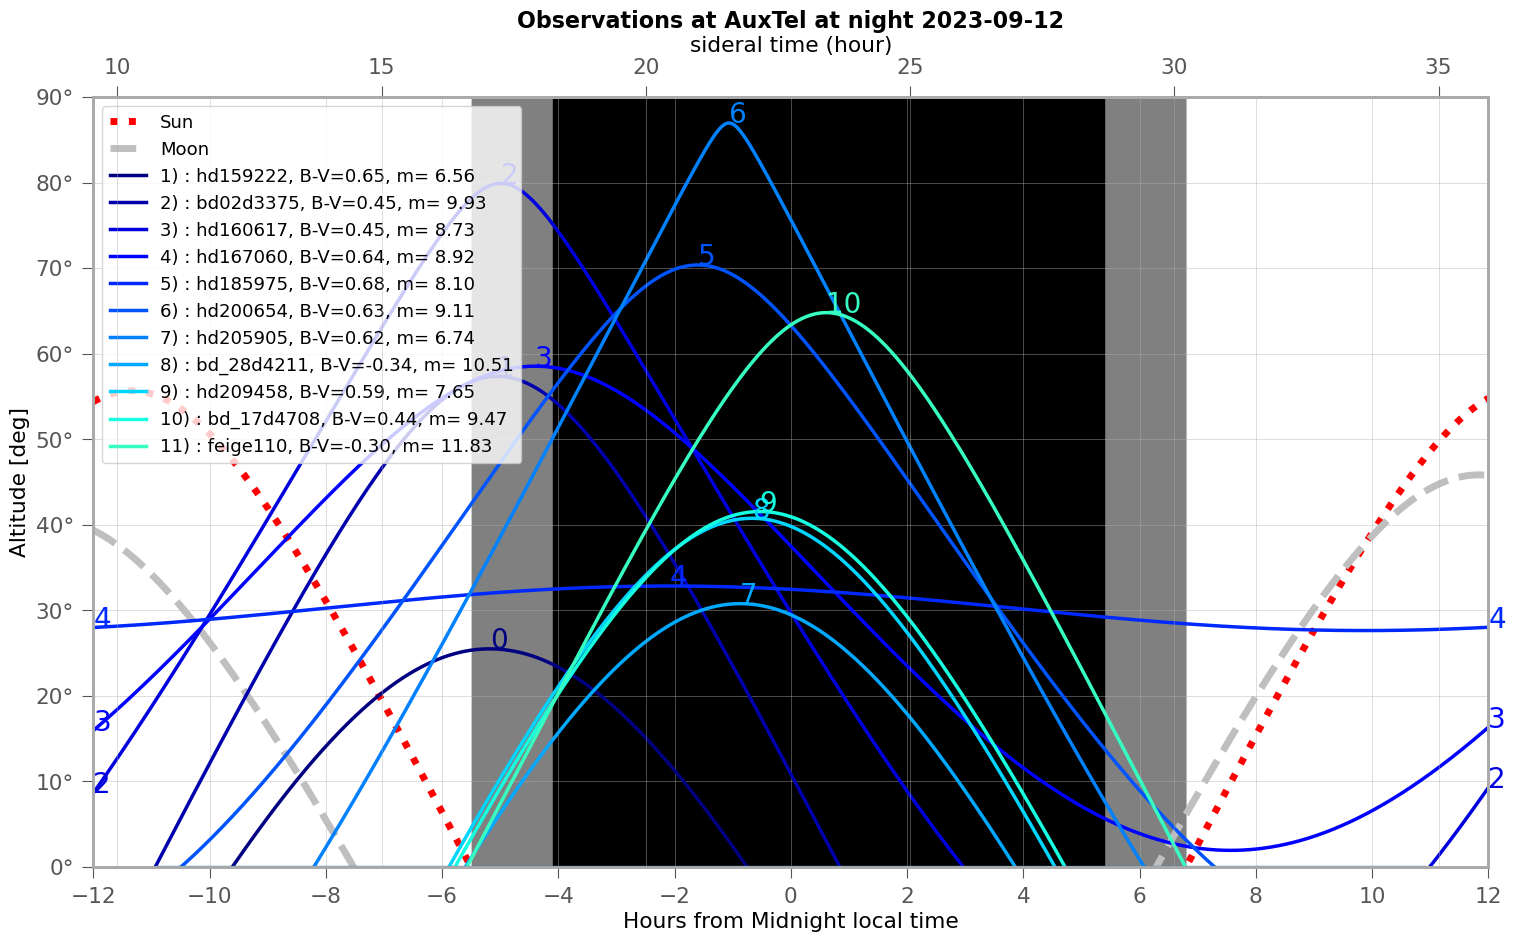

In [58]:
fig = plt.figure(figsize=(18,10))
ax=fig.add_subplot(1,1,1)

# plot sun
ax.plot(delta_midnight, sunaltazs_evening_to_morning.alt, color='r', ls=":",label='Sun',lw=5)
#plot moon
ax.plot(delta_midnight, moonaltazs_evening_to_morning.alt, color=[0.75]*3, ls='--', label='Moon',lw=5)

rank=0
for idx in sorted_indexes:
    
    if all_altitudesmax[idx] > 25:
    
    #label=str(rank)+" : "+t[idx]['tag']
        label = str(rank+1) + ") : " + all_target_tagnames[idx]
    
    
        ax.plot(delta_midnight, all_target_altazs_evening_to_morning[idx].alt,label=label, lw=2.5,color=all_colors[rank])

        if all_target_altazs_evening_to_morning[idx].alt[-1]>0:
            ax.text(delta_midnight[-1], all_target_altazs_evening_to_morning[idx].alt[-1], f'{rank}',color=all_colors[rank],fontsize=20)
        if all_target_altazs_evening_to_morning[idx].alt[0]>0:
            ax.text(delta_midnight[0], all_target_altazs_evening_to_morning[idx].alt[0], f'{rank}',color=all_colors[rank],fontsize=20)
        if all_altitudesmax[idx]:
            ax.text(all_timemax[idx], all_altitudesmax[idx], f'{rank}',color=all_colors[rank],fontsize=20)
    
        rank+=1
    

ax.fill_between(delta_midnight, 0*u.deg, 90*u.deg,sunaltazs_evening_to_morning.alt < -0*u.deg, color='0.5', zorder=0)
ax.fill_between(delta_midnight, 0*u.deg, 90*u.deg,sunaltazs_evening_to_morning.alt < -18*u.deg, color='k', zorder=0)

ax.legend(loc='upper left')
ax.set_xlim(-12*u.hour, 12*u.hour)
ax.set_xticks((np.arange(13)*2-12)*u.hour)
ax.set_ylim(0*u.deg, 90*u.deg)
ax.set_xlabel('Hours from Midnight local time')
ax.set_ylabel('Altitude [deg]')
title = "Observations at AuxTel at night " + night_obs_str.split(" ")[0]
ax.set_title(title)
ax2 = ax.twiny()
ax2.plot([sideral_times[0].hour,sideral_times[-1].hour],[0,0])
ax2.set_xlabel("sideral time (hour)")
figname="AuxtelStarAlt_{:4d}_{:d}_{:d}.png".format(NYEAR,NMONTH,NDAY)

plt.savefig(figname)
plt.show()